In [42]:
!unzip -q -o /content/Pariwisata-20210926T081226Z-001.zip

In [43]:
import os, shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [44]:
base_dir = 'Pariwisata'
csvList = sorted(os.listdir(base_dir))
for i, j in enumerate(csvList):
  # print(i.replace('.csv', '').replace('-', ' '))
  print(i, j)

0 data-jumlah-hotel-berbintang-dan-non-bintang-jakarta-tahun-2020.csv
1 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-agustus-tahun-2020.csv
2 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-april-tahun-2020.csv
3 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-desember-tahun-2020.csv
4 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-februari-tahun-2020.csv
5 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv
6 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-juli-tahun-2020.csv
7 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-juni-tahun-2020.csv
8 data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-maret-t

In [45]:
pd.read_csv(base_dir + '/' + csvList[1])

,tahun,bulan,destinasi_wisata,jumlah
0,2020,8,Taman Impian Jaya Ancol,0
1,2020,8,Taman Mini Indonesia Indah,0
2,2020,8,Taman Margasatwa Ragunan,0
3,2020,8,Monumen Nasional,0
4,2020,8,Museum Nasional,1
5,2020,8,Museum Satria Mandala,0
6,2020,8,Museum Sejarah Jakarta,0
7,2020,8,Museum Tekstil,0
8,2020,8,Museum Bahari,5
9,2020,8,Museum Seni Rupa dan Keramik,10


In [46]:
def concat_all_csv(files, sort_by = None, ascending=True):
  df_list = [pd.read_csv(i) for i in files]
  if sort_by is not None:
    return pd.concat(df_list).sort_values(sort_by, ascending=ascending)
  else:
    return pd.concat(df_list)

In [47]:
concat_all_csv([base_dir + '/' + i for i in csvList[1:13]], 'bulan').to_csv('data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta.csv', index=False)

In [48]:
destination_international = pd.read_csv('data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta.csv')

In [49]:
avg_international_tourist_destination = destination_international.groupby('destinasi_wisata').agg({'jumlah': 'mean'}).sort_values('jumlah', ascending=False)
avg_international_tourist_destination

,jumlah
destinasi_wisata,
Kawasan Kota Tua,1315.583333
Museum Nasional,449.750000
Monumen Nasional,361.583333
Museum Sejarah Jakarta,331.833333
Kepulauan Seribu,301.166667
Museum Wayang,219.833333
Taman Impian Jaya Ancol,89.666667
Taman Margasatwa Ragunan,87.833333
Museum Seni Rupa dan Keramik,58.500000


In [52]:
concat_all_csv([base_dir + '/' + i for i in csvList[13:25]], 'bulan').replace({'Museum Joang 45': 'Museum Joang'}).to_csv('data-jumlah-kunjungan-wisatawan-nusantara-ke-destinasi-wisata-di-provinsi-dki-jakarta.csv', index=False)

In [53]:
destination_national = pd.read_csv('data-jumlah-kunjungan-wisatawan-nusantara-ke-destinasi-wisata-di-provinsi-dki-jakarta.csv')

In [54]:
avg_national_tourist_destination = destination_national.groupby('destinasi_wisata').agg({'jumlah': 'mean'}).sort_values('jumlah', ascending=False)
avg_national_tourist_destination

,jumlah
destinasi_wisata,
Taman Impian Jaya Ancol,380244.333333
Taman Mini Indonesia Indah,178114.333333
Taman Margasatwa Ragunan,103394.750000
Kawasan Kota Tua,99149.833333
Monumen Nasional,53285.693750
Kepulauan Seribu,20884.333333
Museum Sejarah Jakarta,12777.000000
PBB Setu babakan,12317.416667
Museum Nasional,10680.333333


In [55]:
len(avg_national_tourist_destination), len(avg_international_tourist_destination)

(20, 20)

In [56]:
tourist_destination = avg_national_tourist_destination.join(avg_international_tourist_destination, lsuffix='_national', rsuffix='_international', how='outer')
tourist_destination = tourist_destination.fillna(0)

In [57]:
tourist_destination.columns = ['avg_total_national', 'avg_total_international']
tourist_destination

,avg_total_national,avg_total_international
destinasi_wisata,,
Kawasan Kota Tua,99149.833333,1315.583333
Kepulauan Seribu,20884.333333,301.166667
Monumen Nasional,53285.693750,361.583333
Museum Bahari,760.416667,45.750000
Museum Joang,299.666667,2.750000
Museum Nasional,10680.333333,449.750000
Museum Prasasti,329.833333,6.666667
Museum Satria Mandala,265.250000,0.000000
Museum Sejarah Jakarta,12777.000000,331.833333


In [58]:
tourist_destination['avg_total_international_percentage'] = tourist_destination['avg_total_international'] / tourist_destination['avg_total_international'].sum() * 100
tourist_destination['avg_total_national_percentage'] = tourist_destination['avg_total_national'] / tourist_destination['avg_total_national'].sum() * 100

In [59]:
tourist_destination

,avg_total_national,avg_total_international,avg_total_international_percentage,avg_total_national_percentage
destinasi_wisata,,,,
Kawasan Kota Tua,99149.833333,1315.583333,39.501076,11.185191
Kepulauan Seribu,20884.333333,301.166667,9.042686,2.355982
Monumen Nasional,53285.693750,361.583333,10.856728,6.011212
Museum Bahari,760.416667,45.750000,1.373668,0.085783
Museum Joang,299.666667,2.750000,0.082570,0.033806
Museum Nasional,10680.333333,449.750000,13.503978,1.204859
Museum Prasasti,329.833333,6.666667,0.200170,0.037209
Museum Satria Mandala,265.250000,0.000000,0.000000,0.029923
Museum Sejarah Jakarta,12777.000000,331.833333,9.963469,1.441386


pada graph di bawah dapat dilihat beberapa tempat pariwisata favorit turis mancanegara dan turis dalam negri

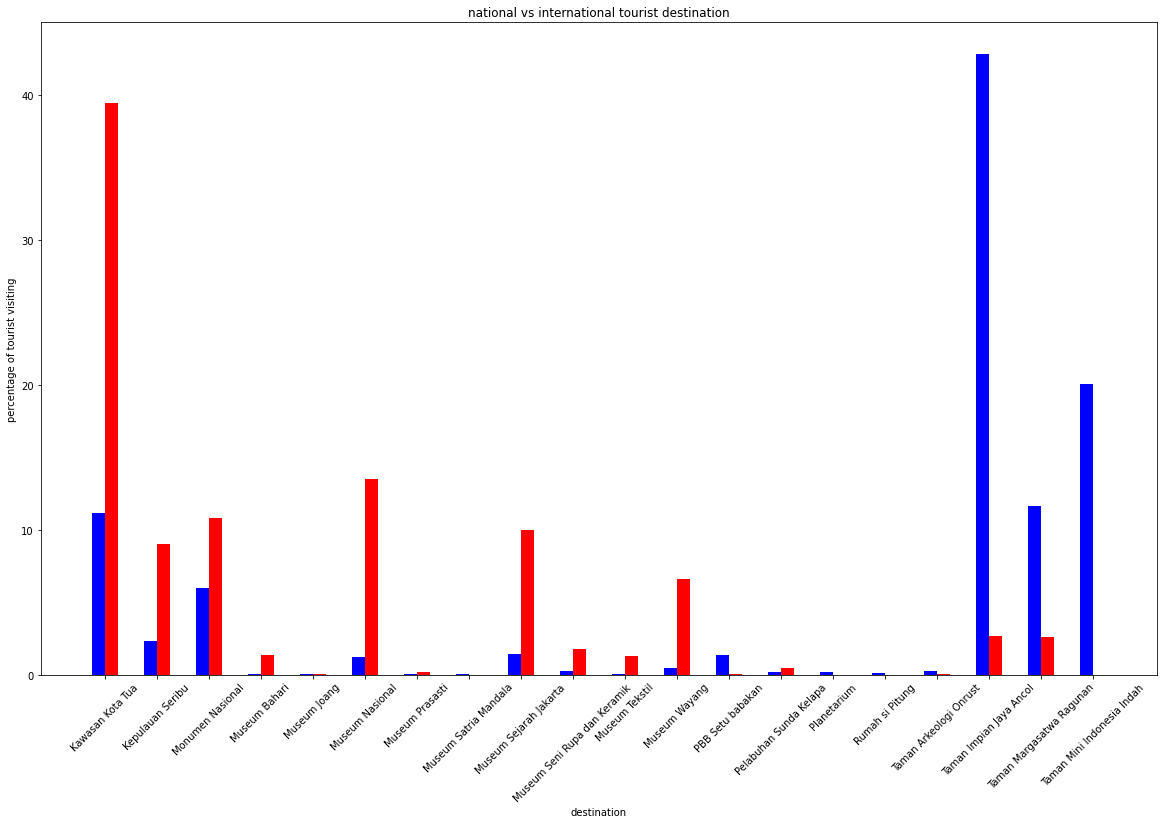

In [60]:
idx = np.arange(len(tourist_destination)) * 2
plt.figure(figsize=(20, 12))
plt.bar(idx - 0.25, tourist_destination['avg_total_national_percentage'], color='blue', width=0.5)
plt.bar(idx + 0.25, tourist_destination['avg_total_international_percentage'], color='red', width=0.5)
plt.xticks(idx, tourist_destination.index, rotation=45)
plt.title('national vs international tourist destination')
plt.xlabel('destination')
plt.ylabel('percentage of tourist visiting', rotation = 90)
plt.show()

In [64]:
def plotDestination(df, title=''):
  plt.figure(figsize=(20, 12))
  month = np.arange(12) + 1
  unique_values = df['destinasi_wisata'].unique()
  cmap = plt.cm.get_cmap('hsv', len(unique_values))
  for i,j in enumerate(unique_values):
    # print(j)
    cond = df['destinasi_wisata'] == j
    # print(cond)
    plt.plot(month, df[cond]['jumlah'], c = cmap(i), label = j)
  plt.xticks(month, month)
  plt.title(title)
  plt.ylabel('total')
  plt.xlabel('month')
  plt.legend()
  plt.show()

pada graph di bawah kita dapat melihat bahwa terjadi penurunan pengunjung menjadi 0 untuk semua destinasi turis pada bulan ke 4 hingga ke 5, hal ini diperkirakan karena terjadi penutupan selama 2 bulan.

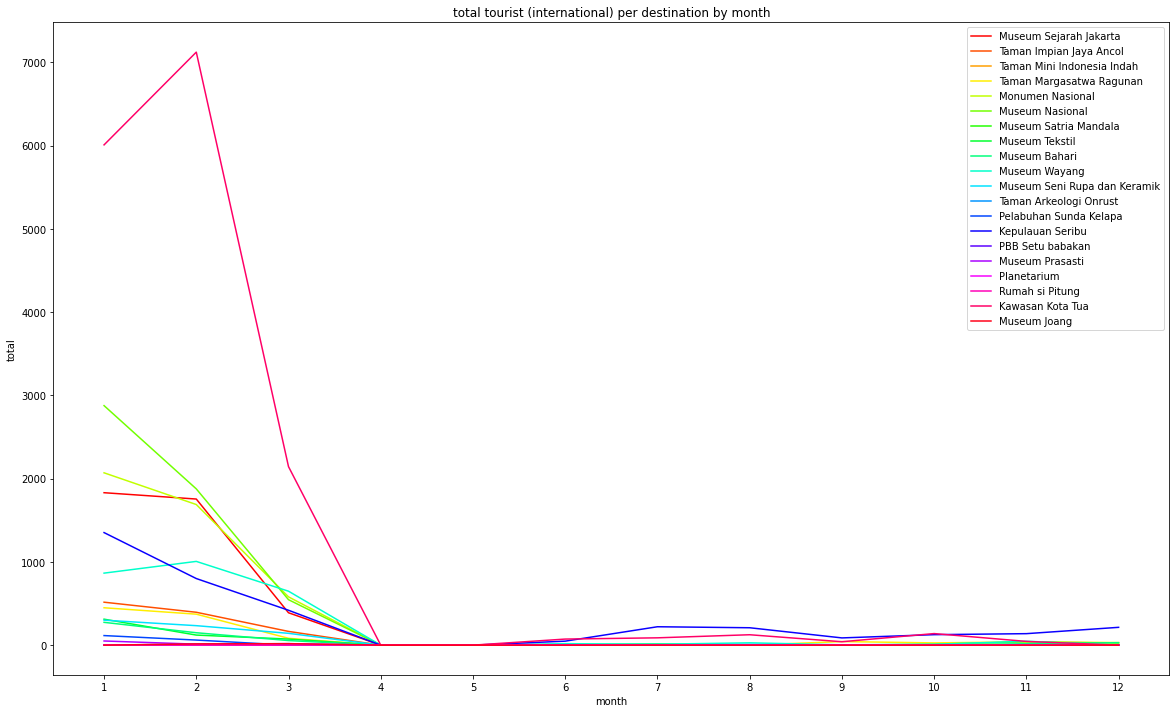

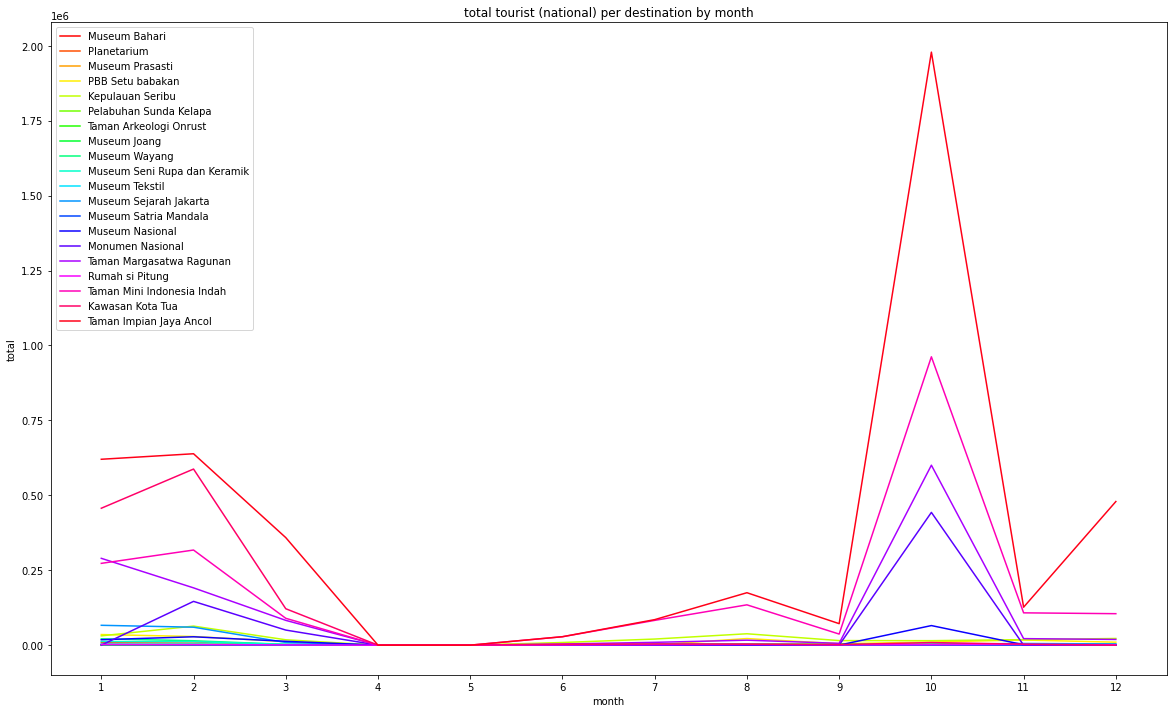

In [65]:
plotDestination(destination_international, 'total tourist (international) per destination by month')
plotDestination(destination_national, 'total tourist (national) per destination by month')